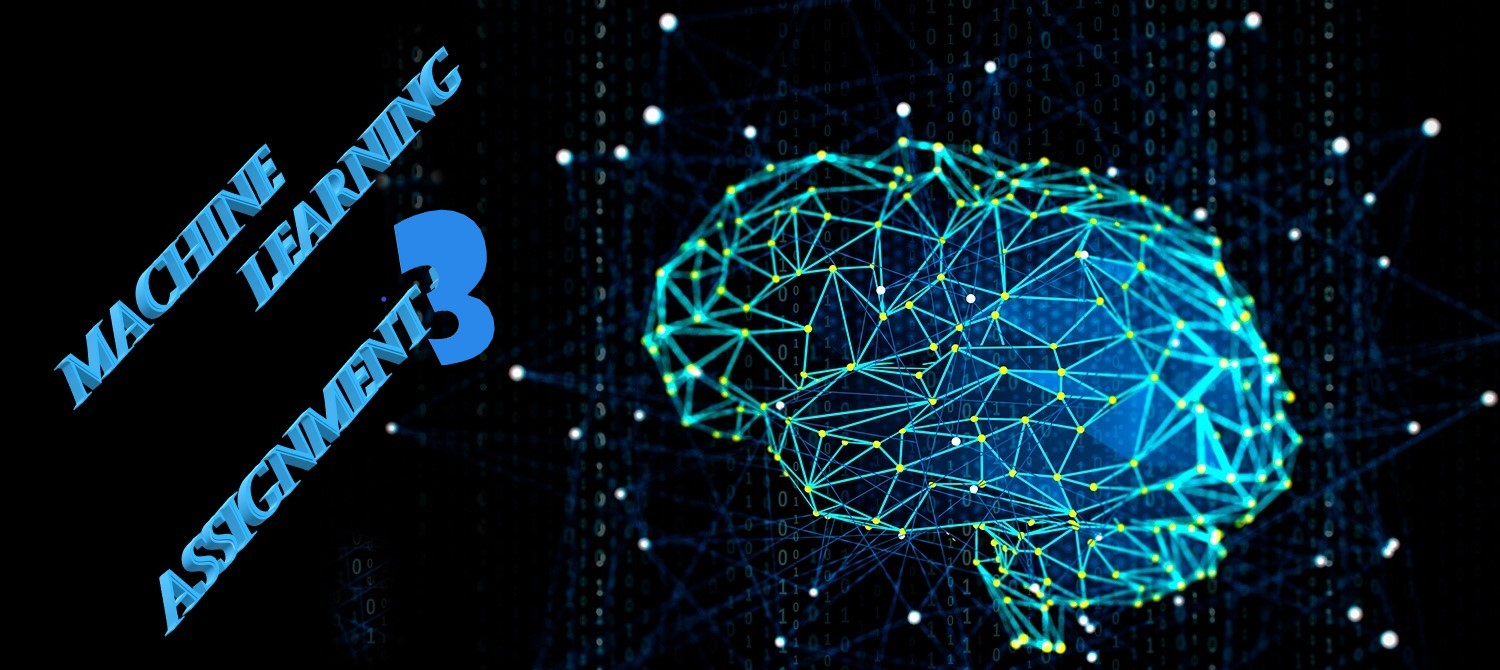

In [1]:
from IPython.display import Image
Image("ML.jpg")

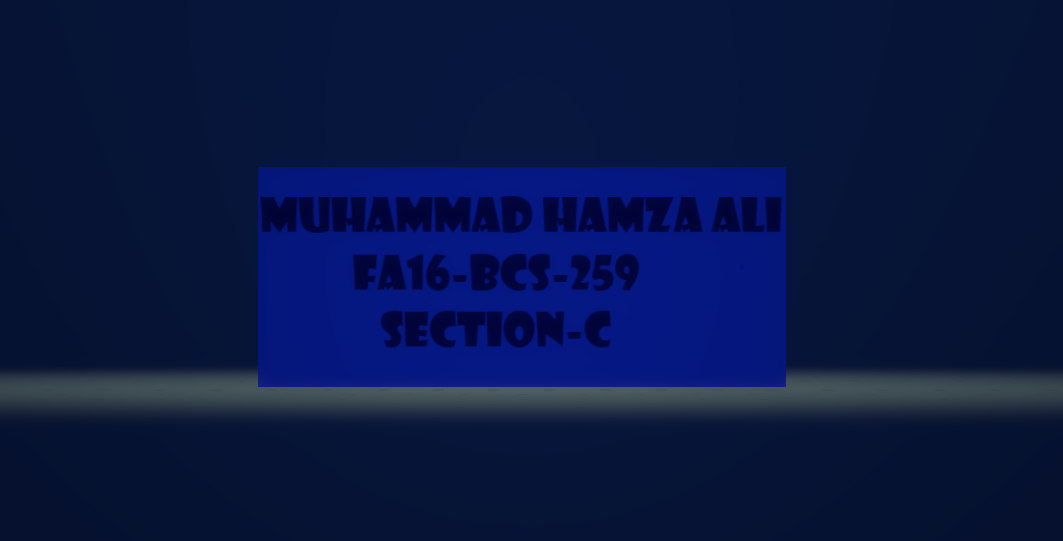

In [2]:
Image("Reg.png")


# Step 1: Import Libraries

In [3]:
import xlrd
import re
import csv
import string
import scipy
import pickle
import pandas as pd 
import numpy as np 
from sklearn.feature_extraction.text  import *
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from astropy.table import Table, Column
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Step 2: Read, Understand and Preprocess Train/Test Data

## Step 2.1: Read Data

In [4]:

train_File= 'train.csv'
test_File = 'test.csv'

train_DataFrame= pd.read_csv(train_File).rename_axis('Index',axis=1)
test_DataFrame= pd.read_csv(test_File).rename_axis('Index',axis=1)

## Step 2.2: Understand Data

In [5]:
print("Train Dataset")
train_DataFrame


Train Dataset


Index,height,weight,hair,beared,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male
5,165.0000,150,Medium,No,Yes,Female


In [6]:
print("Train Dataset Columns")
train_Dataset = train_DataFrame.columns
train_Dataset


Train Dataset Columns


Index(['height', 'weight', 'hair', 'beared', 'scarf', 'gender'], dtype='object', name='Index')

In [7]:
print("Number Of Instances In Train Dataset")
train_Data = len(train_DataFrame)
print("Train Instances: ",train_Data)


Number Of Instances In Train Dataset
Train Instances:  6


In [8]:
print("Test Dataset")
test_DataFrame

Test Dataset


Index,height,weight,hair,beared,scarf,gender
0,179.1,185,Long,Yes,No,Male
1,160.5,130,Short,No,No,Female
2,177.8,160,Bald,No,No,Male
3,161.1,160,Medium,No,No,Female


In [9]:
print("Test Dataset Columns")
test_Dataset = test_DataFrame.columns
test_Dataset

Test Dataset Columns


Index(['height', 'weight', 'hair', 'beared', 'scarf', 'gender'], dtype='object', name='Index')

In [10]:
print("Number Of Instances In Test Dataset")
test_Data = len(test_DataFrame)
print("Test Instances: ",test_Data)


Number Of Instances In Test Dataset
Test Instances:  4


In [11]:
train_Male=train_DataFrame.loc[train_DataFrame['gender'] == 'Male']
train_Male_Count = len(train_Male)
print(train_Male_Count,' Train instances having label Male')
train_Male

3  Train instances having label Male


Index,height,weight,hair,beared,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
2,178.5000,200,Short,No,No,Male
4,175.2222,220,Short,Yes,No,Male


In [12]:
train_Female = train_DataFrame.loc[train_DataFrame['gender'] == 'Female']
train_Female_Count = len(train_Female)
print(train_Female_Count,' Train instances having label Female')
train_Female

3  Train instances having label Female


Index,height,weight,hair,beared,scarf,gender
1,170.0,120,Long,No,No,Female
3,163.4,110,Medium,No,Yes,Female
5,165.0,150,Medium,No,Yes,Female


In [13]:
test_Male = test_DataFrame.loc[test_DataFrame['gender'] == 'Male']
test_Male_Count = len(test_Male)
print(test_Male_Count,' Test instances having label Male')
test_Male

2  Test instances having label Male


Index,height,weight,hair,beared,scarf,gender
0,179.1,185,Long,Yes,No,Male
2,177.8,160,Bald,No,No,Male


In [14]:
test_Female = test_DataFrame.loc[test_DataFrame['gender'] == 'Female']
test_Female_Count = len(test_Female)
print(test_Female_Count,' Test instances having label Male')
test_Female

2  Test instances having label Male


Index,height,weight,hair,beared,scarf,gender
1,160.5,130,Short,No,No,Female
3,161.1,160,Medium,No,No,Female


Total Number of 'Males' And 'Females' In Train Dataset


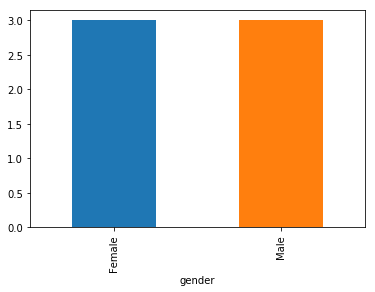

In [15]:
print("Total Number of 'Males' And 'Females' In Train Dataset")
train_DataFrame.reset_index().groupby('gender')['index'].nunique().plot(kind='bar')

Total Number of 'Males' And 'Females' In Test Dataset


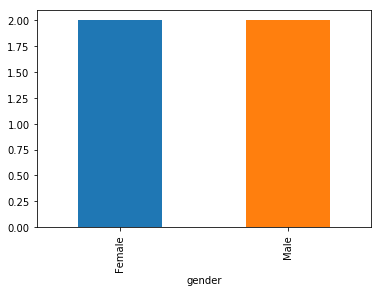

In [16]:
print("Total Number of 'Males' And 'Females' In Test Dataset")
test_DataFrame.reset_index().groupby('gender')['index'].nunique().plot(kind='bar')

Number of people having various hair length in Train Dataset


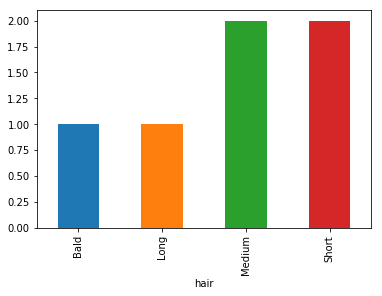

In [17]:
print("Number of people having various hair length in Train Dataset")
train_DataFrame.reset_index().groupby('hair')['index'].nunique().plot(kind='bar')

Number of people having various hair length in Test Dataset


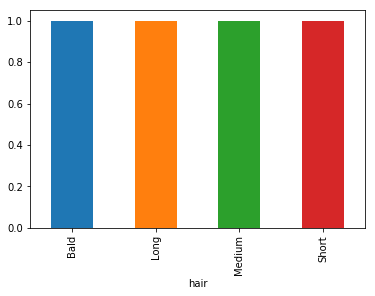

In [18]:
print("Number of people having various hair length in Test Dataset")
test_DataFrame.reset_index().groupby('hair')['index'].nunique().plot(kind='bar')

Number of people have/heven't beard in Train Dataset


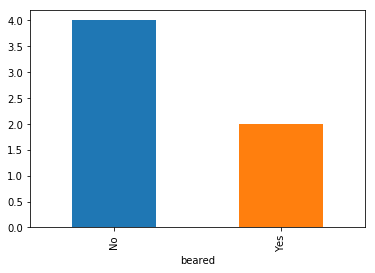

In [19]:
print("Number of people have/heven't beard in Train Dataset")
train_DataFrame.reset_index().groupby('beared')['index'].nunique().plot(kind='bar')

Number of people have/heven't beard in Test Dataset


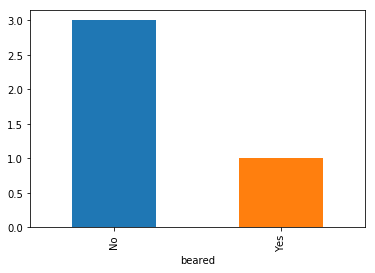

In [20]:
print("Number of people have/heven't beard in Test Dataset")
test_DataFrame.reset_index().groupby('beared')['index'].nunique().plot(kind='bar')

## Step 2.3: Pre-Process Data

In [21]:
#Train dataset  before pre-processing
print('Train dataset  before pre-processing')
train_DataFrame

Train dataset  before pre-processing


Index,height,weight,hair,beared,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male
5,165.0000,150,Medium,No,Yes,Female


In [22]:
#Train dataset After-Processing
print("Train dataset After-Processing")
train_Preprocessed =train_DataFrame.fillna(" ")
train_Preprocessed = train_DataFrame.round({'height': 2})
train_Preprocessed

Train dataset After-Processing


Index,height,weight,hair,beared,scarf,gender
0,180.30,196,Bald,Yes,No,Male
1,170.00,120,Long,No,No,Female
2,178.50,200,Short,No,No,Male
3,163.40,110,Medium,No,Yes,Female
4,175.22,220,Short,Yes,No,Male
5,165.00,150,Medium,No,Yes,Female


# Step 3: Label Encoding For Train Test Data

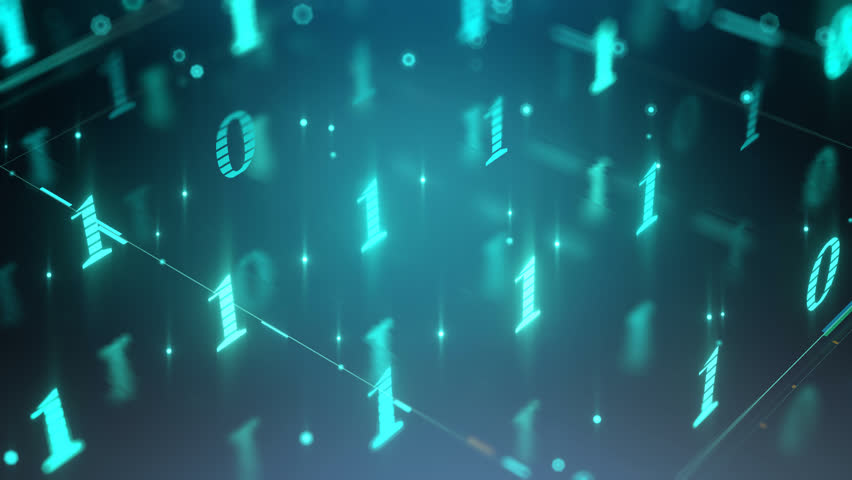

In [23]:
Image("1.jpg")

In [24]:
from sklearn import preprocessing
LabelEncoder= preprocessing.LabelEncoder()
train_Preprocessed['encoded_hair'] = LabelEncoder.fit_transform(train_Preprocessed['hair'])
train_Preprocessed['encoded_beared'] = LabelEncoder.fit_transform(train_Preprocessed['beared'])
train_Preprocessed['encoded_scarf'] = LabelEncoder.fit_transform(train_Preprocessed['scarf'])
train_Preprocessed['encoded_gender'] = LabelEncoder.fit_transform(train_Preprocessed['gender'])

In [25]:
#Gender Attribute Encoding in train dataset
train_Preprocessed[['gender','encoded_gender']]

Index,gender,encoded_gender
0,Male,1
1,Female,0
2,Male,1
3,Female,0
4,Male,1
5,Female,0


In [26]:
#Scarf attribte encoding in train datasset
train_Preprocessed[['scarf','encoded_scarf']]

Index,scarf,encoded_scarf
0,No,0
1,No,0
2,No,0
3,Yes,1
4,No,0
5,Yes,1


In [27]:
#Beared attribte encoding in train datasset
train_Preprocessed[['beared','encoded_beared']]

Index,beared,encoded_beared
0,Yes,1
1,No,0
2,No,0
3,No,0
4,Yes,1
5,No,0


In [28]:
#Hair attribte encoding in train datasset
train_Preprocessed[['hair','encoded_hair']]

Index,hair,encoded_hair
0,Bald,0
1,Long,1
2,Short,3
3,Medium,2
4,Short,3
5,Medium,2


In [29]:
# original train dataset
print('Original train dataset')
train_Preprocessed.loc[:,'height':'gender']

Original train dataset


Index,height,weight,hair,beared,scarf,gender
0,180.30,196,Bald,Yes,No,Male
1,170.00,120,Long,No,No,Female
2,178.50,200,Short,No,No,Male
3,163.40,110,Medium,No,Yes,Female
4,175.22,220,Short,Yes,No,Male
5,165.00,150,Medium,No,Yes,Female


In [30]:
print("Train Data After Label encoding")
train_encoded_Data = pd.DataFrame()
train_encoded_Data['height'] = train_Preprocessed['height']
train_encoded_Data['weight'] = train_Preprocessed['weight']
train_encoded_Data['hair'] =   train_Preprocessed['encoded_hair']
train_encoded_Data['beared'] = train_Preprocessed['encoded_beared']
train_encoded_Data['scarf'] =  train_Preprocessed['encoded_scarf']
train_encoded_Data['gender'] = train_Preprocessed['encoded_gender']
train_encoded_Data.rename_axis('Index',axis=1)

Train Data After Label encoding


Index,height,weight,hair,beared,scarf,gender
0,180.30,196,0,1,0,1
1,170.00,120,1,0,0,0
2,178.50,200,3,0,0,1
3,163.40,110,2,0,1,0
4,175.22,220,3,1,0,1
5,165.00,150,2,0,1,0


In [31]:
#Original test data after preprocessing 
print('Original test data')
test_DataFrame.fillna(" ")
test_DataFrame.loc[:,'height':'gender'].round({'height': 2}).rename_axis('Index',axis=1)

Original test data


Index,height,weight,hair,beared,scarf,gender
0,179.1,185,Long,Yes,No,Male
1,160.5,130,Short,No,No,Female
2,177.8,160,Bald,No,No,Male
3,161.1,160,Medium,No,No,Female


In [32]:

test_DataFrame['encoded_hair'] = LabelEncoder.fit_transform(test_DataFrame['hair'])
test_DataFrame['encoded_beared'] = LabelEncoder.fit_transform(test_DataFrame['beared'])
test_DataFrame['encoded_scarf'] = LabelEncoder.fit_transform(test_DataFrame['scarf'])
test_DataFrame['encoded_gender'] = LabelEncoder.fit_transform(test_DataFrame['gender'])


In [33]:
print("Test Data After Label encoding")
test_encoded_Data = pd.DataFrame()
test_encoded_Data['height'] = test_DataFrame['height']
test_encoded_Data['weight'] = test_DataFrame['weight']
test_encoded_Data['hair'] =   test_DataFrame['encoded_hair']
test_encoded_Data['beared'] = test_DataFrame['encoded_beared']
test_encoded_Data['scarf'] =  test_DataFrame['encoded_scarf']
test_encoded_Data['gender'] = test_DataFrame['encoded_gender']
test_encoded_Data

Test Data After Label encoding


,height,weight,hair,beared,scarf,gender
0,179.1,185,1,1,0,1
1,160.5,130,3,0,0,0
2,177.8,160,0,0,0,1
3,161.1,160,2,0,0,0


# Step 5: Train ML Algorithm Using Train Data

In [34]:
X_Train = train_encoded_Data.loc[:,'height':'scarf']
Y_Train = train_encoded_Data['gender']
X_Test = test_encoded_Data.loc[:,'height':'scarf']
Y_Test = test_encoded_Data['gender']


In [35]:

print('Parameters and their values')
LG = LogisticRegression(multi_class='ovr',n_jobs=1, solver='liblinear')
LG_pred=LG.fit(X_Train, Y_Train).predict(X_Test)
LG.score(X_Train, Y_Train)

LG

Parameters and their values


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:

print('Parameters and their values')
Random_Forest = RandomForestClassifier(n_estimators=100)
RF_pred=Random_Forest.fit(X_Train, Y_Train).predict(X_Test)
Random_Forest.score(X_Train, Y_Train)
Random_Forest

Parameters and their values


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:

print('Parameters and their values')
Li_SVC = LinearSVC(max_iter=1000)
LSVC_pred=Li_SVC.fit(X_Train, Y_Train).predict(X_Test)
Li_SVC.score(X_Train, Y_Train)
Li_SVC

Parameters and their values


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [38]:
print('Parameters and their values')
B_NB=BernoulliNB() 
B_NB_pred=B_NB.fit(X_Train, Y_Train).predict(X_Test)
B_NB.score(X_Train, Y_Train)
B_NB

Parameters and their values


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

# Step 6: Evaluate ML Algorithm Using Test Data

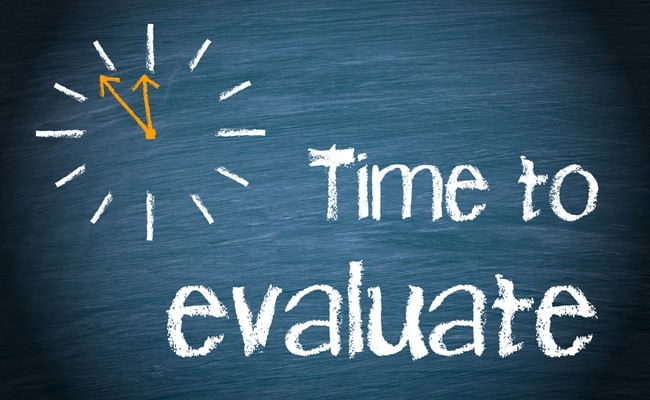

In [39]:
Image("evaluate.jpg")

In [40]:
print('Prediction using Logistic regression')
LogReg_Acc = accuracy_score(Y_Test, LG_pred, normalize = True)
print('Accuracy Score',LogReg_Acc)

pred_LogReg = pd.DataFrame()
LabelEncoder.fit_transform(train_DataFrame['gender'])
pred_LogReg['predicted_gender'] = LabelEncoder.inverse_transform(LG_pred)
pred_LogReg


Prediction using Logistic regression
Accuracy Score 0.75


,predicted_gender
0,Male
1,Female
2,Female
3,Female


In [41]:
print('Prediction using Random Forest Classifier')
RanF_Acc = accuracy_score(Y_Test, RF_pred, normalize = True)
print('Accuracy Score',RanF_Acc)

pred_RanForest = pd.DataFrame()
pred_RanForest = test_DataFrame.loc[:,'height':'gender']
pred_RanForest['predicted_gender'] = LabelEncoder.inverse_transform(RF_pred)
pred_RanForest


Prediction using Random Forest Classifier
Accuracy Score 1.0


Index,height,weight,hair,beared,scarf,gender,predicted_gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Male
3,161.1,160,Medium,No,No,Female,Female


In [42]:
print('Prediction using Random Forest LinearSVC')
LSVC_Acc = accuracy_score(Y_Test, LSVC_pred, normalize = True)
print('Accuracy Score',LSVC_Acc)

pred_LinearSVC = pd.DataFrame()
pred_LinearSVC = test_DataFrame.loc[:,'height':'gender']
pred_LinearSVC['predicted_gender'] = LabelEncoder.inverse_transform(LSVC_pred)
pred_LinearSVC


Prediction using Random Forest LinearSVC
Accuracy Score 0.75


Index,height,weight,hair,beared,scarf,gender,predicted_gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Female
3,161.1,160,Medium,No,No,Female,Female


In [43]:
print('Prediction using Random Forest LinearSVC')
BNB_Acc = accuracy_score(Y_Test, B_NB_pred, normalize = True)
print('Accuracy Score',BNB_Acc)

pred_BernoulliNB = pd.DataFrame()
pred_BernoulliNB = test_DataFrame.loc[:,'height':'gender']
pred_BernoulliNB['predicted_gender'] = LabelEncoder.inverse_transform(B_NB_pred)
pred_BernoulliNB


Prediction using Random Forest LinearSVC
Accuracy Score 1.0


Index,height,weight,hair,beared,scarf,gender,predicted_gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Male
3,161.1,160,Medium,No,No,Female,Female


# Step 7: Selection Of Best Model

In [44]:
models = []
models.append(('Logistic Regression'))
models.append(('Randon Forest Classifier')) 
models.append(('LinearSVC'))
models.append(('BernoulliNB'))

result = []
result.append((LogReg_Acc))
result.append((RanF_Acc))
result.append((LSVC_Acc))
result.append((BNB_Acc))



In [45]:
print('Detailed Performances of All Models')
prettyTable = PrettyTable()
prettyTable.field_names = ['Models','Results']

prettyTable.add_row([models[0],result[0]])
prettyTable.add_row([models[1],result[1]])
prettyTable.add_row([models[2],result[2]])
prettyTable.add_row([models[3],result[3]])

print(prettyTable)



Detailed Performances of All Models
+--------------------------+---------+
|          Models          | Results |
+--------------------------+---------+
|   Logistic Regression    |   0.75  |
| Randon Forest Classifier |   1.0   |
|        LinearSVC         |   0.75  |
|       BernoulliNB        |   1.0   |
+--------------------------+---------+


In [46]:
print('Best Model')
i = result.index(np.amax(result))
print (prettyTable.get_string(start=i,end=i+1))    


Best Model
+--------------------------+---------+
|          Models          | Results |
+--------------------------+---------+
| Randon Forest Classifier |   1.0   |
+--------------------------+---------+


# Step 8: Application Phase

## Step 8.1: Combine Data (Train + test)

In [47]:
print('Train features in form of Dataframe')
train_encoded_Data.loc[:,'height':'scarf'] = train_encoded_Data.loc[:,'height':'scarf'].astype(float)
train_features = train_encoded_Data[0:]
train_features.rename_axis('Index',axis=1)

Train features in form of Dataframe


Index,height,weight,hair,beared,scarf,gender
0,180.30,196.0,0.0,1.0,0.0,1
1,170.00,120.0,1.0,0.0,0.0,0
2,178.50,200.0,3.0,0.0,0.0,1
3,163.40,110.0,2.0,0.0,1.0,0
4,175.22,220.0,3.0,1.0,0.0,1
5,165.00,150.0,2.0,0.0,1.0,0


In [48]:
print('Test features in form of Dataframe')
test_encoded_Data.loc[:,'height':'scarf'] = test_encoded_Data.loc[:,'height':'scarf'].astype(float)
test_features = test_encoded_Data[0:]
test_features.rename_axis('Index',axis=1)

Test features in form of Dataframe


Index,height,weight,hair,beared,scarf,gender
0,179.1,185.0,1.0,1.0,0.0,1
1,160.5,130.0,3.0,0.0,0.0,0
2,177.8,160.0,0.0,0.0,0.0,1
3,161.1,160.0,2.0,0.0,0.0,0


In [49]:
print('All features in form of Dataframe')
all_features = pd.concat([train_features,test_features])
all_features

All features in form of Dataframe


,height,weight,hair,beared,scarf,gender
0,180.30,196.0,0.0,1.0,0.0,1
1,170.00,120.0,1.0,0.0,0.0,0
2,178.50,200.0,3.0,0.0,0.0,1
3,163.40,110.0,2.0,0.0,1.0,0
4,175.22,220.0,3.0,1.0,0.0,1
5,165.00,150.0,2.0,0.0,1.0,0
0,179.10,185.0,1.0,1.0,0.0,1
1,160.50,130.0,3.0,0.0,0.0,0
2,177.80,160.0,0.0,0.0,0.0,1
3,161.10,160.0,2.0,0.0,0.0,0


## Step 8.2: Train Best Model On All Data

In [50]:

X_Train = all_features.loc[:,'height':'scarf']
Y_Train = all_features['gender']
print('Parameters and their values')
Random_Forest = RandomForestClassifier(n_estimators=10,n_jobs=1)
RF_pred=Random_Forest.fit(X_Train, Y_Train)
Random_Forest.score(X_Train, Y_Train)
Random_Forest

Parameters and their values


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Step 8.3: Save Trained Model As Pickle File

In [51]:
import pickle

pickle.dump(Random_Forest, open('trained_Model.pkl', 'wb'))
 

# Step 9: Make Prediction On Unseen Data

## Step 9.1: Load Trained Model

In [52]:
loaded_trained_model = pickle.load(open('trained_Model.pkl', 'rb'))


## Step 9.2: Take Input From User

In [53]:
height = float(input("Please Enter your height here (centimeter): "))
weight = int(input("Please Enter your weight here (Kilogram): "))
hair =   input("Please Enter your hair length here (Bald/Long/Short?Medium): ")
beared = input("Do you have beared? (Yes/No): ")
scarf =  input("Do you wear scarf? (Yes/No): ")

Please Enter your height here (centimeter): 170
Please Enter your weight here (Kilogram): 120
Please Enter your hair length here (Bald/Long/Short?Medium): Long
Do you have beared? (Yes/No): No
Do you wear scarf? (Yes/No): No


## Step 9.3: Convert User Input To feature Vector

In [54]:
print('User input in actual dataframe form')
input_DataFrame = pd.DataFrame({'height':height,'weight':weight,'hair':hair,'beared':beared,'scarf':scarf},index =[0])
input_DataFrame

User input in actual dataframe form


,height,weight,hair,beared,scarf
0,170.0,120,Long,No,No


In [55]:
print('User input in encoded dataframe form')
input_encoded_Data = pd.DataFrame()
input_encoded_Data['height'] = input_DataFrame['height']
input_encoded_Data['weight'] = input_DataFrame['weight']
LabelEncoder.fit(train_DataFrame['hair'])
input_encoded_Data['hair'] = LabelEncoder.transform(input_DataFrame['hair'])
LabelEncoder.fit(train_DataFrame['beared'])
input_encoded_Data['beared'] = LabelEncoder.transform(input_DataFrame['beared'])
LabelEncoder.fit(train_DataFrame['scarf'])
input_encoded_Data['scarf'] = LabelEncoder.transform(input_DataFrame['scarf'])

input_encoded_Data

User input in encoded dataframe form


,height,weight,hair,beared,scarf
0,170.0,120,1,0,0


## Step 9.4: Apply Trained Model On Feature Vector Of Unseen Data And Give Prediction

In [56]:
pred= loaded_trained_model.predict(input_encoded_Data)
LabelEncoder.fit_transform(train_DataFrame['gender'])
Unseen_Prediction = LabelEncoder.inverse_transform(pred)
print('Prediction :', Unseen_Prediction )

Prediction : ['Female']
